In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 66.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6419f414f925bb2fe9a9459418f5b3af7104683f5e860cd2c15ebd615cbb3f4d
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
import pickle

In [ ]:
from torchvision import models
from torchsummary import summary

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# embeddings_balanced_b_path = 'drive/MyDrive/DataBank/wordEmbedding/binary/balanced/em_3.csv'
# embeddings_balanced_b_path_im = 'drive/MyDrive/DataBank/wordEmbedding/binary/imbalanced/em_3.csv'

embeddings_balanced_b_path = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/binary/balanced/em_3.csv'
embeddings_balanced_b_path_im = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/binary/imbalanced/em_3.csv'

In [ ]:
plt_data_balanced = []
plt_data_imbalanced = []
plt_ROC_balanced = []
plt_ROC_imbalanced = []

#Balanced Dataset

In [ ]:
import sys
import numpy as np

def predictive_entropy(predictions):
    epsilon = sys.float_info.min
    predictive_entropy = -np.sum( np.mean(predictions, axis=0) * np.log(np.mean(predictions, axis=0) + epsilon),
            axis=-1)

    return predictive_entropy

#UNI - Directional

Adam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.7335062623023987. Accuracy: 73.51266% F1: 71.79% cohen_kappa: 0.4698
Iteration: 2000. Loss: 0.5596963167190552. Accuracy: 71.86709% F1: 65.79% cohen_kappa: 0.4357
Iteration: 3000. Loss: 0.48472315073013306. Accuracy: 73.89241% F1: 69.48% cohen_kappa: 0.4766
Iteration: 4000. Loss: 0.5005718469619751. Accuracy: 76.99367% F1: 75.53% cohen_kappa: 0.5395
Iteration: 5000. Loss: 0.573641300201416. Accuracy: 77.72152% F1: 79.46% cohen_kappa: 0.5551
Iteration: 6000. Loss: 0.6778548955917358. Accuracy: 78.10127% F1: 79.53% cohen_kappa: 0.5626
Iteration: 7000. Loss: 0.9526869654655457. Accuracy: 75.82278% F1: 79.01% cohen_kappa: 0.5177
Iteration: 8000. Loss: 0.5210223197937012. Accuracy: 79.17722% F1: 80.38% cohen_kappa: 0.5840
Uncertainity: 0.6867286


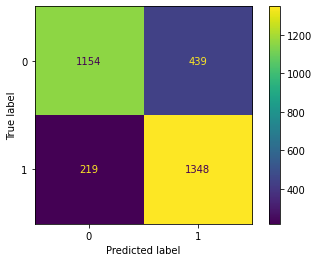

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())
                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-UNI','Adam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.4945456087589264. Accuracy: 74.55696% F1: 72.14% cohen_kappa: 0.4904
Iteration: 2000. Loss: 0.6348294615745544. Accuracy: 73.25949% F1: 68.95% cohen_kappa: 0.4640
Iteration: 3000. Loss: 0.5822154879570007. Accuracy: 77.43671% F1: 78.00% cohen_kappa: 0.5490
Iteration: 4000. Loss: 0.6141294240951538. Accuracy: 76.17089% F1: 78.64% cohen_kappa: 0.5244
Iteration: 5000. Loss: 0.4436754584312439. Accuracy: 76.93038% F1: 79.08% cohen_kappa: 0.5394
Iteration: 6000. Loss: 0.3304043412208557. Accuracy: 77.12025% F1: 78.67% cohen_kappa: 0.5430
Iteration: 7000. Loss: 0.6540657877922058. Accuracy: 75.37975% F1: 72.09% cohen_kappa: 0.5067
Iteration: 8000. Loss: 0.48588448762893677. Accuracy: 77.43671% F1: 77.17% cohen_kappa: 0.5487
Uncertainity: 0.6931088


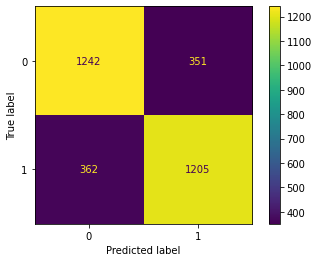

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())
                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-UNI','NAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.5506124496459961. Accuracy: 73.63924% F1: 75.56% cohen_kappa: 0.4735
Iteration: 2000. Loss: 0.41893234848976135. Accuracy: 74.01899% F1: 71.20% cohen_kappa: 0.4796
Iteration: 3000. Loss: 0.4145771861076355. Accuracy: 66.26582% F1: 73.87% cohen_kappa: 0.3286
Iteration: 4000. Loss: 0.7017509937286377. Accuracy: 77.24684% F1: 75.49% cohen_kappa: 0.5444
Iteration: 5000. Loss: 0.4805436134338379. Accuracy: 77.27848% F1: 78.64% cohen_kappa: 0.5461
Iteration: 6000. Loss: 0.6886603832244873. Accuracy: 77.68987% F1: 76.22% cohen_kappa: 0.5534
Iteration: 7000. Loss: 0.3499053120613098. Accuracy: 76.07595% F1: 72.33% cohen_kappa: 0.5205
Iteration: 8000. Loss: 0.44215041399002075. Accuracy: 78.41772% F1: 77.22% cohen_kappa: 0.5680
Uncertainity: 0.6895126


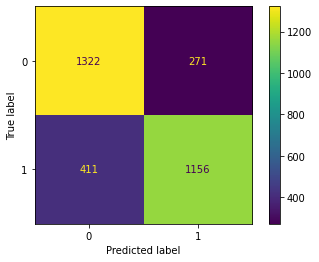

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())
                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('RNN-UNI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-UNI','RAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.4610963761806488. Accuracy: 74.49367% F1: 73.63% cohen_kappa: 0.4896
Iteration: 2000. Loss: 0.5558859705924988. Accuracy: 74.96835% F1: 72.96% cohen_kappa: 0.4988
Iteration: 3000. Loss: 0.6023002862930298. Accuracy: 74.93671% F1: 77.25% cohen_kappa: 0.4996
Iteration: 4000. Loss: 0.392892062664032. Accuracy: 76.77215% F1: 76.35% cohen_kappa: 0.5353
Iteration: 5000. Loss: 0.717309296131134. Accuracy: 74.77848% F1: 77.89% cohen_kappa: 0.4968
Iteration: 6000. Loss: 0.4669759273529053. Accuracy: 78.00633% F1: 79.09% cohen_kappa: 0.5605
Iteration: 7000. Loss: 0.4743429720401764. Accuracy: 73.41772% F1: 77.53% cohen_kappa: 0.4700
Iteration: 8000. Loss: 0.6337363123893738. Accuracy: 74.39873% F1: 71.18% cohen_kappa: 0.4871
Uncertainity: 0.668996


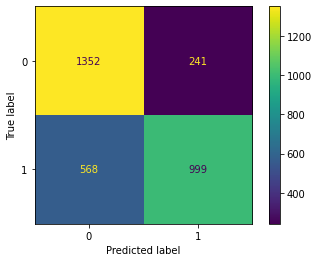

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())
                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-BI','Adam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam


dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.45728015899658203. Accuracy: 73.35443% F1: 76.09% cohen_kappa: 0.4681
Iteration: 2000. Loss: 0.6280523538589478. Accuracy: 75.94937% F1: 75.00% cohen_kappa: 0.5187
Iteration: 3000. Loss: 0.5908385515213013. Accuracy: 74.62025% F1: 77.31% cohen_kappa: 0.4934
Iteration: 4000. Loss: 0.6153523921966553. Accuracy: 75.44304% F1: 78.21% cohen_kappa: 0.5099
Iteration: 5000. Loss: 0.7229641675949097. Accuracy: 77.40506% F1: 75.40% cohen_kappa: 0.5475
Iteration: 6000. Loss: 0.5476006269454956. Accuracy: 78.48101% F1: 78.86% cohen_kappa: 0.5698
Iteration: 7000. Loss: 0.3603774905204773. Accuracy: 74.39873% F1: 69.55% cohen_kappa: 0.4867
Iteration: 8000. Loss: 0.5598041415214539. Accuracy: 78.25949% F1: 79.64% cohen_kappa: 0.5657
Uncertainity: 0.6848362


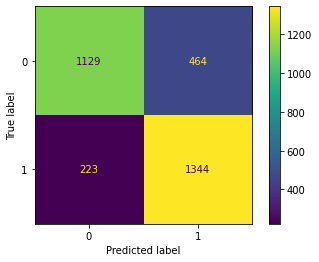

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())
                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-BI','NAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15800 1024
Iteration: 1000. Loss: 0.3464987874031067. Accuracy: 71.10759% F1: 75.13% cohen_kappa: 0.4237
Iteration: 2000. Loss: 0.40240001678466797. Accuracy: 74.81013% F1: 71.43% cohen_kappa: 0.4953
Iteration: 3000. Loss: 0.8803303837776184. Accuracy: 75.31646% F1: 77.07% cohen_kappa: 0.5070
Iteration: 4000. Loss: 0.4832982122898102. Accuracy: 75.60127% F1: 77.85% cohen_kappa: 0.5129
Iteration: 5000. Loss: 0.45357686281204224. Accuracy: 77.94304% F1: 77.67% cohen_kappa: 0.5588
Iteration: 6000. Loss: 0.5654783248901367. Accuracy: 73.16456% F1: 77.33% cohen_kappa: 0.4649
Iteration: 7000. Loss: 0.6969000101089478. Accuracy: 76.77215% F1: 79.05% cohen_kappa: 0.5363
Iteration: 8000. Loss: 0.5061780214309692. Accuracy: 74.62025% F1: 69.83% cohen_kappa: 0.4911
Uncertainity: 0.64482695


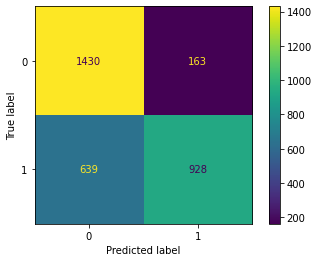

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())




        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('RNN-BI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-BI','RAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#Imbalance Dataset

#UNI - Directional

Adam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.4917154908180237. Accuracy: 74.95298% F1: 76.30% cohen_kappa: 0.5012
Iteration: 2000. Loss: 0.6262423396110535. Accuracy: 77.30408% F1: 76.77% cohen_kappa: 0.5459
Iteration: 3000. Loss: 0.5377758145332336. Accuracy: 77.49216% F1: 76.43% cohen_kappa: 0.5490
Iteration: 4000. Loss: 0.4541710913181305. Accuracy: 78.15047% F1: 77.23% cohen_kappa: 0.5623
Iteration: 5000. Loss: 0.6011613011360168. Accuracy: 76.55172% F1: 73.25% cohen_kappa: 0.5280
Iteration: 6000. Loss: 0.43441542983055115. Accuracy: 76.42633% F1: 72.81% cohen_kappa: 0.5252
Iteration: 7000. Loss: 0.4302264153957367. Accuracy: 77.93103% F1: 76.44% cohen_kappa: 0.5574
Iteration: 8000. Loss: 0.4466472566127777. Accuracy: 79.49843% F1: 79.38% cohen_kappa: 0.5902
Uncertainity: 0.69286543


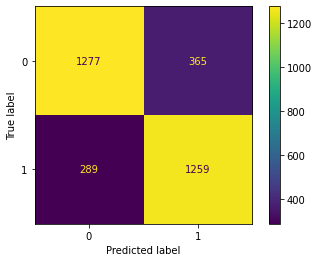

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-UNI','Adam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.6082708835601807. Accuracy: 73.47962% F1: 76.22% cohen_kappa: 0.4736
Iteration: 2000. Loss: 0.6658275127410889. Accuracy: 74.95298% F1: 70.85% cohen_kappa: 0.4953
Iteration: 3000. Loss: 0.4438895285129547. Accuracy: 77.93103% F1: 77.79% cohen_kappa: 0.5588
Iteration: 4000. Loss: 0.6640067100524902. Accuracy: 77.83699% F1: 77.04% cohen_kappa: 0.5562
Iteration: 5000. Loss: 0.49175891280174255. Accuracy: 76.45768% F1: 78.66% cohen_kappa: 0.5324
Iteration: 6000. Loss: 0.41093525290489197. Accuracy: 77.68025% F1: 78.90% cohen_kappa: 0.5555
Iteration: 7000. Loss: 0.6080904603004456. Accuracy: 78.30721% F1: 78.68% cohen_kappa: 0.5670
Iteration: 8000. Loss: 0.6670433878898621. Accuracy: 78.93417% F1: 77.19% cohen_kappa: 0.5771
Uncertainity: 0.6866566


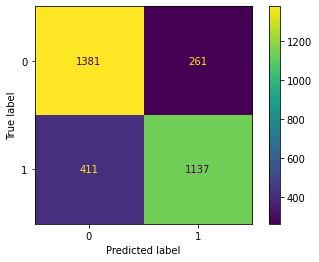

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'NAdam',loss.item()))


pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-UNI','NAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.5859235525131226. Accuracy: 74.70219% F1: 73.55% cohen_kappa: 0.4932
Iteration: 2000. Loss: 0.6298494338989258. Accuracy: 75.67398% F1: 77.14% cohen_kappa: 0.5157
Iteration: 3000. Loss: 0.5353447198867798. Accuracy: 70.90909% F1: 61.46% cohen_kappa: 0.4102
Iteration: 4000. Loss: 0.5750422477722168. Accuracy: 76.99060% F1: 77.81% cohen_kappa: 0.5412
Iteration: 5000. Loss: 0.5141903758049011. Accuracy: 77.02194% F1: 74.79% cohen_kappa: 0.5384
Iteration: 6000. Loss: 0.6244086623191833. Accuracy: 76.83386% F1: 78.57% cohen_kappa: 0.5393
Iteration: 7000. Loss: 0.35666733980178833. Accuracy: 79.43574% F1: 79.28% cohen_kappa: 0.5889
Iteration: 8000. Loss: 0.3189445734024048. Accuracy: 76.67712% F1: 73.10% cohen_kappa: 0.5303
Uncertainity: 0.6646817


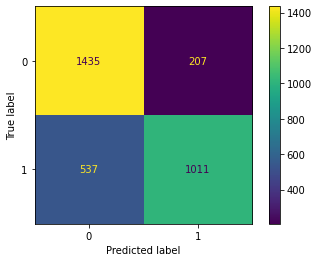

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_UNI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_UNI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0

            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())



                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('RNN-UNI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-UNI','RAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.7924292683601379. Accuracy: 74.63950% F1: 71.82% cohen_kappa: 0.4902
Iteration: 2000. Loss: 0.8370109796524048. Accuracy: 74.95298% F1: 71.90% cohen_kappa: 0.4963
Iteration: 3000. Loss: 0.5538305044174194. Accuracy: 75.14107% F1: 72.07% cohen_kappa: 0.5000
Iteration: 4000. Loss: 0.5864670872688293. Accuracy: 76.86520% F1: 77.65% cohen_kappa: 0.5387
Iteration: 5000. Loss: 0.3884551227092743. Accuracy: 77.33542% F1: 75.62% cohen_kappa: 0.5452
Iteration: 6000. Loss: 0.5381659269332886. Accuracy: 78.74608% F1: 79.57% cohen_kappa: 0.5763
Iteration: 7000. Loss: 0.46950000524520874. Accuracy: 77.96238% F1: 75.87% cohen_kappa: 0.5574
Iteration: 8000. Loss: 0.4931584894657135. Accuracy: 74.10658% F1: 67.86% cohen_kappa: 0.4766
Uncertainity: 0.6291042


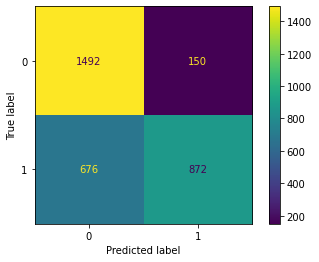

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'Adam',loss.item()))


pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-BI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.5101584196090698. Accuracy: 75.14107% F1: 74.13% cohen_kappa: 0.5021
Iteration: 2000. Loss: 0.454295814037323. Accuracy: 76.55172% F1: 77.66% cohen_kappa: 0.5328
Iteration: 3000. Loss: 0.5037927031517029. Accuracy: 76.92790% F1: 77.52% cohen_kappa: 0.5397
Iteration: 4000. Loss: 0.5946401953697205. Accuracy: 77.86834% F1: 75.67% cohen_kappa: 0.5554
Iteration: 5000. Loss: 0.6221994161605835. Accuracy: 77.83699% F1: 78.56% cohen_kappa: 0.5580
Iteration: 6000. Loss: 0.3862803876399994. Accuracy: 79.68652% F1: 79.26% cohen_kappa: 0.5936
Iteration: 7000. Loss: 0.4328185021877289. Accuracy: 78.62069% F1: 76.66% cohen_kappa: 0.5707
Iteration: 8000. Loss: 0.5289124846458435. Accuracy: 78.18182% F1: 78.41% cohen_kappa: 0.5643
Uncertainity: 0.6920885


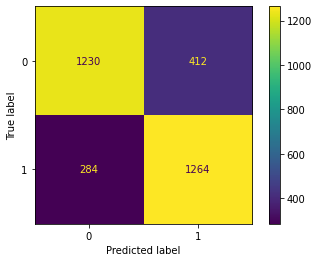

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-BI','NAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 1024
Iteration: 1000. Loss: 0.6648104786872864. Accuracy: 75.45455% F1: 75.92% cohen_kappa: 0.5101
Iteration: 2000. Loss: 0.4086781144142151. Accuracy: 76.89655% F1: 76.14% cohen_kappa: 0.5375
Iteration: 3000. Loss: 0.4463638663291931. Accuracy: 77.08464% F1: 76.12% cohen_kappa: 0.5410
Iteration: 4000. Loss: 0.445075124502182. Accuracy: 76.92790% F1: 76.10% cohen_kappa: 0.5380
Iteration: 5000. Loss: 0.498807430267334. Accuracy: 78.15047% F1: 77.11% cohen_kappa: 0.5622
Iteration: 6000. Loss: 0.4976220726966858. Accuracy: 78.30721% F1: 78.85% cohen_kappa: 0.5672
Iteration: 7000. Loss: 0.5962380170822144. Accuracy: 77.77429% F1: 78.96% cohen_kappa: 0.5573
Iteration: 8000. Loss: 0.40610113739967346. Accuracy: 78.46395% F1: 76.53% cohen_kappa: 0.5676
Uncertainity: 0.6819607


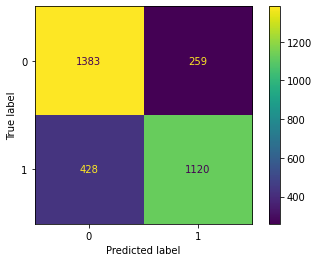

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)


dataset_b = dataset_b.to_numpy()


data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 1024
hidden_size = 1024
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class RNN_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(RNN_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For uni Directional RNN
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.softmax = nn.Softmax(dim = 1)
      self.dropout = nn.Dropout(.1)


  def forward(self, x):
      # set initial hidden and cell states
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional

      #Forward Propagation
      out, _  = self.rnn(x,h0) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits
'''
INSTANTIATE MODEL CLASS
'''
model = RNN_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)


        labels = labels.to(device)


        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('RNN-BI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'RNN-BI','RAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)


ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

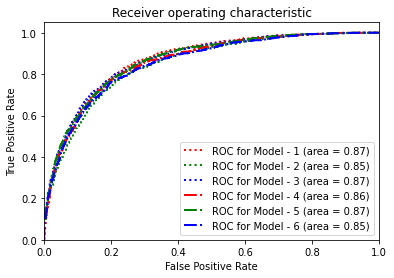

In [ ]:
# plot ROC for blanaced dataset
plt.figure()
lw = 2

colors = ['red','green','blue']

for i in range(3):
  plt.plot(
      plt_ROC_balanced[i][0],
      plt_ROC_balanced[i][1],
      color=colors[i],
      lw=lw,
      linestyle="dotted",
      label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_balanced[i][2]))

for i in range(3,6):
  plt.plot(
      plt_ROC_balanced[i][0],
      plt_ROC_balanced[i][1],
      color=colors[i-3],
      lw=lw,
      linestyle="dashdot",
      label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_balanced[i][2]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="best")
plt.show()

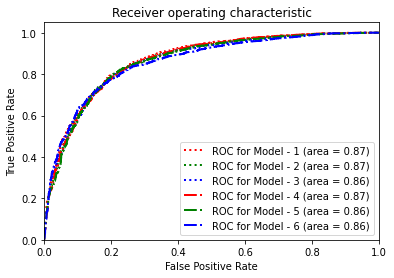

In [ ]:
# plot ROC for imblanaced dataset

plt.figure()
lw = 2
colors = ['red','green','blue']

for i in range(3):
  plt.plot(
      plt_ROC_imbalanced[i][0],
      plt_ROC_imbalanced[i][1],
      color=colors[i],
      lw=lw,
      linestyle="dotted",
      label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_imbalanced[i][2]))

for i in range(3,6):
  plt.plot(
      plt_ROC_imbalanced[i][0],
      plt_ROC_imbalanced[i][1],
      color=colors[i-3],
      lw=lw,
      linestyle="dashdot",
      label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_imbalanced[i][2]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="best")
plt.show()

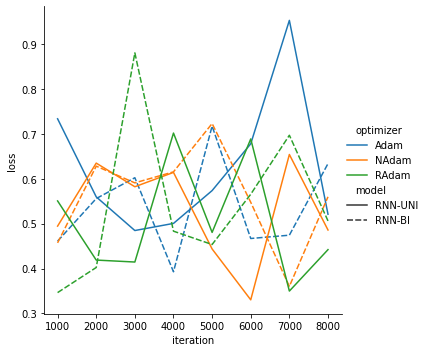

In [ ]:
plt_df = pd.DataFrame.from_records(
    plt_data_balanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

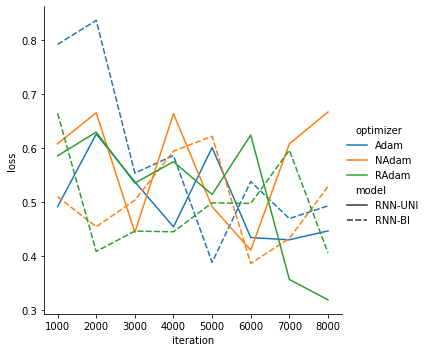

In [ ]:
plt_df = pd.DataFrame.from_records(
    plt_data_imbalanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

In [ ]:
import datetime
ct = datetime.datetime.now()
print("current time:-", ct)

current time:- 2023-03-05 14:50:12.183203
